In [12]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "html.parser")
    text = [p.text for p in soup.find('div', class_="text").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://www.kafka-online.info/the-trial.html',
        'https://www.kafka-online.info/the-metamorphosis.html',
        'https://www.kafka-online.info/before-the-law.html',
        'https://www.kafka-online.info/in-the-penal-colony.html',
        'https://www.kafka-online.info/a-hunger-artist.html',
        'https://www.kafka-online.info/jackals-and-arabs.html',
        'https://www.kafka-online.info/a-report-for-an-academy.html',
        'https://www.kafka-online.info/a-country-doctor.html',
        'https://www.kafka-online.info/an-imperial-message.html',
        'https://www.kafka-online.info/-the-judgement.html',
        'https://www.kafka-online.info/the-great-wall-of-china.html',
        'https://www.kafka-online.info/the-hunter-gracchus.html',
        'https://www.kafka-online.info/up-in-the-gallery.html',
        'https://www.kafka-online.info/josephine-the-songstress-or-the-mouse-folk.html']



In [11]:
page = requests.get('https://www.kafka-online.info/the-metamorphosis.html').text
soup = BeautifulSoup(page, "html.parser")
text = [p.text for p in soup.find('div', class_="text").find_all('p')]
#txt = soup.find('div', class_='text').find_all('p')
text

['One morning, as Gregor Samsa was waking up from anxious dreams, he discovered that in bed he had been changed into a monstrous verminous bug. He lay on his armour-hard back and saw, as he lifted his head up a little, his brown, arched abdomen divided up into rigid bow-like sections. From this height the blanket, just about ready to slide off completely, could hardly stay in place. His numerous legs, pitifully thin in comparison to the rest of his circumference, flickered helplessly before his eyes. ',
 '‘What’s happened to me,’ he thought. It was no dream. His room, a proper room for a human being, only somewhat too small, lay quietly between the four well-known walls. Above the table, on which an unpacked collection of sample cloth goods was spread out (Samsa was a traveling salesman) hung the picture which he had cut out of an illustrated magazine a little while ago and set in a pretty gilt frame. It was a picture of a woman with a fur hat and a fur boa. She sat erect there, liftin

In [13]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://www.kafka-online.info/the-trial.html
https://www.kafka-online.info/the-metamorphosis.html
https://www.kafka-online.info/before-the-law.html
https://www.kafka-online.info/in-the-penal-colony.html
https://www.kafka-online.info/a-hunger-artist.html
https://www.kafka-online.info/jackals-and-arabs.html
https://www.kafka-online.info/a-report-for-an-academy.html
https://www.kafka-online.info/a-country-doctor.html
https://www.kafka-online.info/an-imperial-message.html
https://www.kafka-online.info/-the-judgement.html
https://www.kafka-online.info/the-great-wall-of-china.html
https://www.kafka-online.info/the-hunter-gracchus.html
https://www.kafka-online.info/up-in-the-gallery.html
https://www.kafka-online.info/josephine-the-songstress-or-the-mouse-folk.html


In [15]:
# # Pickle files for later use

# # Make a new directory to hold the text files
# !mkdir transcripts
# Comedian names
books = ['trial', 'metamorphosis', 'before the law', 'penal colony', 'a hunger artist', 'jackals and arabs', 'a report from an academy', 'a country doctor', 'an imperial message', 'the judgement', 'the great wall of china', 'the hunter gracchus', 'up in the gallery', 'Josephine the Songstress']

for i, c in enumerate(books):
    with open(c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [17]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open(c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [21]:
data['metamorphosis']

['One morning, as Gregor Samsa was waking up from anxious dreams, he discovered that in bed he had been changed into a monstrous verminous bug. He lay on his armour-hard back and saw, as he lifted his head up a little, his brown, arched abdomen divided up into rigid bow-like sections. From this height the blanket, just about ready to slide off completely, could hardly stay in place. His numerous legs, pitifully thin in comparison to the rest of his circumference, flickered helplessly before his eyes. ',
 '‘What’s happened to me,’ he thought. It was no dream. His room, a proper room for a human being, only somewhat too small, lay quietly between the four well-known walls. Above the table, on which an unpacked collection of sample cloth goods was spread out (Samsa was a traveling salesman) hung the picture which he had cut out of an illustrated magazine a little while ago and set in a pretty gilt frame. It was a picture of a woman with a fur hat and a fur boa. She sat erect there, liftin

## Cleaning the Data

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results.

Common data cleaning steps on all text:

Make text all lower case
Remove punctuation
Remove numerical values
Remove common non-sensical text (/n)
Tokenize text
Remove stop words
More data cleaning steps after tokenization:

Stemming / lemmatization
Parts of speech tagging
Create bi-grams or tri-grams
Deal with typos
And more...

In [22]:
# We are going to change this to key: book, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [23]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [24]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
Josephine the Songstress,
a country doctor,I was in great difficulty. An urgent journey was facing me. A seriously ill man was waiting for me in a village ten miles distant. A severe snows...
a hunger artist,In the last decades interest in hunger artists has declined considerably. Whereas in earlier days there was good money to be earned putting on m...
a report from an academy,Esteemed Gentlemen of the Academy! You show me the honour of calling upon me to submit a report to the Academy concerning my previous life as a...
an imperial message,"The Emperor—so they say—has sent a message, directly from his death bed, to you alone, his pathetic subject, a tiny shadow which has taken refuge..."
before the law,Before the law sits a gatekeeper. To this gatekeeper comes a man from the country who asks to gain entry into the law. But the gatekeeper says t...
jackals and arabs,"We were camping in the oasis. My companions were asleep. An Arab, tall and dressed in white, went past me. He had been tending to his camels a..."
metamorphosis,"One morning, as Gregor Samsa was waking up from anxious dreams, he discovered that in bed he had been changed into a monstrous verminous bug. He l..."
penal colony,"“It’s a peculiar apparatus,” said the Officer to the Traveller, gazing with a certain admiration at the device, with which he was, of course, tho..."
the great wall of china,The Great Wall of China was finished at its northernmost location. The construction work moved up from the south-east and south-west and joined a...


In [28]:
data_df = data_df.drop(index='Josephine the Songstress')
data_df

,transcript
a country doctor,I was in great difficulty. An urgent journey was facing me. A seriously ill man was waiting for me in a village ten miles distant. A severe snows...
a hunger artist,In the last decades interest in hunger artists has declined considerably. Whereas in earlier days there was good money to be earned putting on m...
a report from an academy,Esteemed Gentlemen of the Academy! You show me the honour of calling upon me to submit a report to the Academy concerning my previous life as a...
an imperial message,"The Emperor—so they say—has sent a message, directly from his death bed, to you alone, his pathetic subject, a tiny shadow which has taken refuge..."
before the law,Before the law sits a gatekeeper. To this gatekeeper comes a man from the country who asks to gain entry into the law. But the gatekeeper says t...
jackals and arabs,"We were camping in the oasis. My companions were asleep. An Arab, tall and dressed in white, went past me. He had been tending to his camels a..."
metamorphosis,"One morning, as Gregor Samsa was waking up from anxious dreams, he discovered that in bed he had been changed into a monstrous verminous bug. He l..."
penal colony,"“It’s a peculiar apparatus,” said the Officer to the Traveller, gazing with a certain admiration at the device, with which he was, of course, tho..."
the great wall of china,The Great Wall of China was finished at its northernmost location. The construction work moved up from the south-east and south-west and joined a...
the hunter gracchus,Two boys were sitting on the wall by the jetty playing dice. A man was reading a newspaper on the steps of a monument in the shadow of a hero wi...


In [29]:
# Let's take a look at the transcript for Ali Wong
data_df.transcript.loc['metamorphosis']

'One morning, as Gregor Samsa was waking up from anxious dreams, he discovered that in bed he had been changed into a monstrous verminous bug. He lay on his armour-hard back and saw, as he lifted his head up a little, his brown, arched abdomen divided up into rigid bow-like sections. From this height the blanket, just about ready to slide off completely, could hardly stay in place. His numerous legs, pitifully thin in comparison to the rest of his circumference, flickered helplessly before his eyes.  ‘What’s happened to me,’ he thought. It was no dream. His room, a proper room for a human being, only somewhat too small, lay quietly between the four well-known walls. Above the table, on which an unpacked collection of sample cloth goods was spread out (Samsa was a traveling salesman) hung the picture which he had cut out of an illustrated magazine a little while ago and set in a pretty gilt frame. It was a picture of a woman with a fur hat and a fur boa. She sat erect there, lifting up 

In [30]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [31]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
a country doctor,i was in great difficulty an urgent journey was facing me a seriously ill man was waiting for me in a village ten miles distant a severe snowstor...
a hunger artist,in the last decades interest in hunger artists has declined considerably whereas in earlier days there was good money to be earned putting on ma...
a report from an academy,esteemed gentlemen of the academy you show me the honour of calling upon me to submit a report to the academy concerning my previous life as an...
an imperial message,the emperor—so they say—has sent a message directly from his death bed to you alone his pathetic subject a tiny shadow which has taken refuge at ...
before the law,before the law sits a gatekeeper to this gatekeeper comes a man from the country who asks to gain entry into the law but the gatekeeper says tha...
jackals and arabs,we were camping in the oasis my companions were asleep an arab tall and dressed in white went past me he had been tending to his camels and wa...
metamorphosis,one morning as gregor samsa was waking up from anxious dreams he discovered that in bed he had been changed into a monstrous verminous bug he lay ...
penal colony,“it’s a peculiar apparatus” said the officer to the traveller gazing with a certain admiration at the device with which he was of course thorough...
the great wall of china,the great wall of china was finished at its northernmost location the construction work moved up from the southeast and southwest and joined at t...
the hunter gracchus,two boys were sitting on the wall by the jetty playing dice a man was reading a newspaper on the steps of a monument in the shadow of a hero wie...


In [32]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [33]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
a country doctor,i was in great difficulty an urgent journey was facing me a seriously ill man was waiting for me in a village ten miles distant a severe snowstor...
a hunger artist,in the last decades interest in hunger artists has declined considerably whereas in earlier days there was good money to be earned putting on ma...
a report from an academy,esteemed gentlemen of the academy you show me the honour of calling upon me to submit a report to the academy concerning my previous life as an...
an imperial message,the emperor—so they say—has sent a message directly from his death bed to you alone his pathetic subject a tiny shadow which has taken refuge at ...
before the law,before the law sits a gatekeeper to this gatekeeper comes a man from the country who asks to gain entry into the law but the gatekeeper says tha...
jackals and arabs,we were camping in the oasis my companions were asleep an arab tall and dressed in white went past me he had been tending to his camels and wa...
metamorphosis,one morning as gregor samsa was waking up from anxious dreams he discovered that in bed he had been changed into a monstrous verminous bug he lay ...
penal colony,its a peculiar apparatus said the officer to the traveller gazing with a certain admiration at the device with which he was of course thoroughly ...
the great wall of china,the great wall of china was finished at its northernmost location the construction work moved up from the southeast and southwest and joined at t...
the hunter gracchus,two boys were sitting on the wall by the jetty playing dice a man was reading a newspaper on the steps of a monument in the shadow of a hero wie...


In [34]:
# Let's add the comedians' full names as well
full_names = ['A Country Doctor', 'A Hunger Artist', 'A Report from the Academy', 'An Imperial Message', 'Before the Law', 'Jackals and Arabs',
              'Metamorphosis', 'In the Penal Colony', 'The Great Wall of China', 'The Hunter Gracchus', 'The Judgement', 'The Trials', 'Up in the Gallery']

data_df['full_name'] = full_names
data_df

,transcript,full_name
a country doctor,I was in great difficulty. An urgent journey was facing me. A seriously ill man was waiting for me in a village ten miles distant. A severe snows...,A Country Doctor
a hunger artist,In the last decades interest in hunger artists has declined considerably. Whereas in earlier days there was good money to be earned putting on m...,A Hunger Artist
a report from an academy,Esteemed Gentlemen of the Academy! You show me the honour of calling upon me to submit a report to the Academy concerning my previous life as a...,A Report from the Academy
an imperial message,"The Emperor—so they say—has sent a message, directly from his death bed, to you alone, his pathetic subject, a tiny shadow which has taken refuge...",An Imperial Message
before the law,Before the law sits a gatekeeper. To this gatekeeper comes a man from the country who asks to gain entry into the law. But the gatekeeper says t...,Before the Law
jackals and arabs,"We were camping in the oasis. My companions were asleep. An Arab, tall and dressed in white, went past me. He had been tending to his camels a...",Jackals and Arabs
metamorphosis,"One morning, as Gregor Samsa was waking up from anxious dreams, he discovered that in bed he had been changed into a monstrous verminous bug. He l...",Metamorphosis
penal colony,"“It’s a peculiar apparatus,” said the Officer to the Traveller, gazing with a certain admiration at the device, with which he was, of course, tho...",In the Penal Colony
the great wall of china,The Great Wall of China was finished at its northernmost location. The construction work moved up from the south-east and south-west and joined a...,The Great Wall of China
the hunter gracchus,Two boys were sitting on the wall by the jetty playing dice. A man was reading a newspaper on the steps of a monument in the shadow of a hero wi...,The Hunter Gracchus


In [35]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [36]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abandoned,abdomen,able,abroad,academy,accepted,accessible,accompanied,accompanying,according,...,write,writing,wrong,years,yellowish,yoke,youd,young,youth,youve
a country doctor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
a hunger artist,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
a report from an academy,0,0,0,0,3,0,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
an imperial message,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
before the law,0,0,0,0,0,0,1,0,0,0,...,0,0,0,4,0,0,0,0,0,0
jackals and arabs,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
metamorphosis,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
penal colony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the great wall of china,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
the hunter gracchus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [38]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [39]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [40]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,a country doctor,a hunger artist,a report from an academy,an imperial message,before the law,jackals and arabs,metamorphosis,penal colony,the great wall of china,the hunter gracchus,the judgement,trial,up in the gallery
abandoned,0,0,0,0,0,0,0,0,1,0,0,0,0
abdomen,0,0,0,0,0,0,2,0,0,0,0,0,0
able,0,0,0,0,0,1,0,0,0,0,0,0,0
abroad,0,0,0,0,0,0,0,0,0,0,1,0,0
academy,0,0,3,0,0,0,0,0,0,0,0,0,0


In [41]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'a country doctor': [('horse', 5),
  ('know', 4),
  ('girl', 4),
  ('horses', 4),
  ('door', 3),
  ('stall', 3),
  ('groom', 3),
  ('stood', 3),
  ('journey', 3),
  ('hey', 2),
  ('bodies', 2),
  ('filled', 2),
  ('village', 2),
  ('going', 2),
  ('says', 2),
  ('face', 2),
  ('hand', 2),
  ('say', 2),
  ('lantern', 2),
  ('powerful', 2),
  ('way', 2),
  ('man', 2),
  ('space', 2),
  ('ill', 2),
  ('said', 2),
  ('ready', 2),
  ('courtyard', 2),
  ('course', 2),
  ('dont', 2),
  ('climb', 2)],
 'a hunger artist': [('hunger', 9),
  ('artist', 8),
  ('day', 4),
  ('cage', 3),
  ('merely', 3),
  ('attention', 3),
  ('watchers', 3),
  ('days', 3),
  ('fasting', 3),
  ('small', 2),
  ('groups', 2),
  ('looking', 2),
  ('secret', 2),
  ('open', 2),
  ('putting', 2),
  ('people', 2),
  ('night', 2),
  ('children', 2),
  ('sticking', 2),
  ('understood', 2),
  ('sat', 2),
  ('deliberately', 1),
  ('depressed', 1),
  ('totally', 1),
  ('slightest', 1),
  ('bars', 1),
  ('fashionable', 1),
  ('

In [42]:
# Print the top 15 words said by each comedian
for book, top_words in top_dict.items():
    print(book)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

a country doctor
horse, know, girl, horses, door, stall, groom, stood, journey, hey, bodies, filled, village, going
---
a hunger artist
hunger, artist, day, cage, merely, attention, watchers, days, fasting, small, groups, looking, secret, open
---
a report from an academy
ape, world, handshake, great, academy, small, nonetheless, things, frankly, earth, memories, gentlemen, music, sense
---
an imperial message
way, message, palace, crowd, herald, courtyards, bed, sun, man, stairs, achieved, door, death, high
---
before the law
gatekeeper, man, law, years, says, asks, inside, things, entry, gate, longer, long, does, grows
---
jackals and arabs
said, im, jackal, jackals, know, north, mother, blood, arab, away, far, eye, right, oldest
---
metamorphosis
thought, fur, head, little, traveling, felt, position, legs, man, human, right, feel, picture, lay
---
penal colony
apparatus, officer, traveller, condemned, man, work, execution, really, said, course, climbed, chains, device, hands
---
the

In [43]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for book in data.columns:
    top = [word for (word, count) in top_dict[book]]
    for t in top:
        words.append(t)
        
words

['horse',
 'know',
 'girl',
 'horses',
 'door',
 'stall',
 'groom',
 'stood',
 'journey',
 'hey',
 'bodies',
 'filled',
 'village',
 'going',
 'says',
 'face',
 'hand',
 'say',
 'lantern',
 'powerful',
 'way',
 'man',
 'space',
 'ill',
 'said',
 'ready',
 'courtyard',
 'course',
 'dont',
 'climb',
 'hunger',
 'artist',
 'day',
 'cage',
 'merely',
 'attention',
 'watchers',
 'days',
 'fasting',
 'small',
 'groups',
 'looking',
 'secret',
 'open',
 'putting',
 'people',
 'night',
 'children',
 'sticking',
 'understood',
 'sat',
 'deliberately',
 'depressed',
 'totally',
 'slightest',
 'bars',
 'fashionable',
 'constant',
 'naturally',
 'strangely',
 'ape',
 'world',
 'handshake',
 'great',
 'academy',
 'small',
 'nonetheless',
 'things',
 'frankly',
 'earth',
 'memories',
 'gentlemen',
 'music',
 'sense',
 'time',
 'people',
 'today',
 'men',
 'order',
 'short',
 'distant',
 'heels',
 'long',
 'speaking',
 'thing',
 'builds',
 'grew',
 'past',
 'metaphors',
 'calendar',
 'way',
 'message

In [54]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('man', 8),
 ('said', 5),
 ('small', 5),
 ('door', 4),
 ('things', 4),
 ('time', 4),
 ('know', 3),
 ('way', 3),
 ('course', 3),
 ('people', 3),
 ('long', 3),
 ('bed', 3),
 ('come', 3),
 ('room', 3),
 ('right', 3),
 ('horse', 2),
 ('going', 2),
 ('says', 2),
 ('hand', 2),
 ('powerful', 2),
 ('ready', 2),
 ('day', 2),
 ('merely', 2),
 ('groups', 2),
 ('open', 2),
 ('understood', 2),
 ('great', 2),
 ('earth', 2),
 ('men', 2),
 ('thing', 2),
 ('death', 2),
 ('years', 2),
 ('fur', 2),
 ('close', 2),
 ('sleeping', 2),
 ('stranger', 2),
 ('little', 2),
 ('window', 2),
 ('place', 2),
 ('like', 2),
 ('work', 2),
 ('mouth', 2),
 ('woman', 2),
 ('opened', 2),
 ('girl', 1),
 ('horses', 1),
 ('stall', 1),
 ('groom', 1),
 ('stood', 1),
 ('journey', 1),
 ('hey', 1),
 ('bodies', 1),
 ('filled', 1),
 ('village', 1),
 ('face', 1),
 ('say', 1),
 ('lantern', 1),
 ('space', 1),
 ('ill', 1),
 ('courtyard', 1),
 ('dont', 1),
 ('climb', 1),
 ('hunger', 1),
 ('artist', 1),
 ('cage', 1),
 ('attention', 1),
 ('

In [55]:
add_stop_words = []
ddd = ['like', 'dont','thought', 'said', 'looked', 'know', 'thats', 'youre', 'gonna', 'got', 'right', 'think', 'just', 'im', 'know', 'say', 'want', 'going', 'thing', 'come', 'didnt', 'went', 'cause', 'hes', 'shes', 'goes', 'theres', 'day', 'there', 'theyre', 'joke', 'did', 'good', 'repeat', 'stuff', 'ive', 'id', 'says', 'tell', 'lot', 'point', 'hey', 'ok', 'look', 'little', 'guy', 'guys', 'shit', 'fuck', 'fucking', 'cos', 'oh', 'year', 'saying', 'gotta', 'let', 'dude', 'make', 'doing', 'need', 'wanna', 'um', 'mean', 'hed', 'really', 'way', 'big', 'uh', 'okay', 'doesnt', 'real', 'jokes', 'whats', 'everybody']
for i in ddd:
    add_stop_words.append(i)
add_stop_words

['like',
 'dont',
 'thought',
 'said',
 'looked',
 'know',
 'thats',
 'youre',
 'gonna',
 'got',
 'right',
 'think',
 'just',
 'im',
 'know',
 'say',
 'want',
 'going',
 'thing',
 'come',
 'didnt',
 'went',
 'cause',
 'hes',
 'shes',
 'goes',
 'theres',
 'day',
 'there',
 'theyre',
 'joke',
 'did',
 'good',
 'repeat',
 'stuff',
 'ive',
 'id',
 'says',
 'tell',
 'lot',
 'point',
 'hey',
 'ok',
 'look',
 'little',
 'guy',
 'guys',
 'shit',
 'fuck',
 'fucking',
 'cos',
 'oh',
 'year',
 'saying',
 'gotta',
 'let',
 'dude',
 'make',
 'doing',
 'need',
 'wanna',
 'um',
 'mean',
 'hed',
 'really',
 'way',
 'big',
 'uh',
 'okay',
 'doesnt',
 'real',
 'jokes',
 'whats',
 'everybody']

In [56]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [57]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

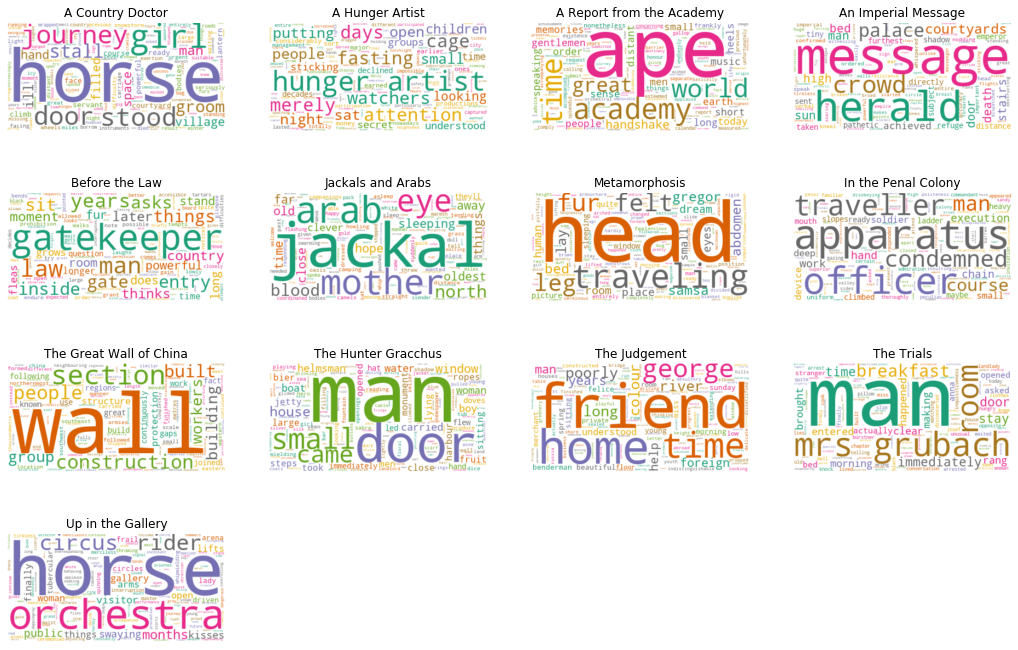

In [59]:

# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18, 12]

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()